# In this notebook we will visualize the Convolutional Layer Outputs of CNNs

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(f'Shape of the train set : {X_train.shape}')
print(f'Shape of the test set : {X_test.shape}')

Shape of the train set : (60000, 28, 28)
Shape of the test set : (10000, 28, 28)


# Normalizing and preparing the images

In [4]:
X_train = X_train / 255.
X_test = X_test / 255.

assert np.max(X_train) <= 255.
assert np.max(X_test) <= 255.

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print(f'Shape of the train set : {X_train.shape}')
print(f'Shape of the test set : {X_test.shape}')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f'Labels changed to one hot encodings, shape : {y_train.shape}')

Shape of the train set : (60000, 28, 28, 1)
Shape of the test set : (10000, 28, 28, 1)
Labels changed to one hot encodings, shape : (60000, 10)


# Building the CNN model

In [5]:
input_shape = X_train[0].shape
rate = 0.25

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape, name='ConvLayer-1'),
    MaxPooling2D((2, 2), name='MaxPooling-1'),
    Dropout(0.25),
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape, name='ConvLayer-2'),
    MaxPooling2D((2, 2), name='MaxPooling-2'),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(rate),
    Dense(128, activation='relu'),
    Dropout(rate),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ConvLayer-1 (Conv2D)         (None, 28, 28, 16)        160       
_________________________________________________________________
MaxPooling-1 (MaxPooling2D)  (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
ConvLayer-2 (Conv2D)         (None, 14, 14, 32)        4640      
_________________________________________________________________
MaxPooling-2 (MaxPooling2D)  (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

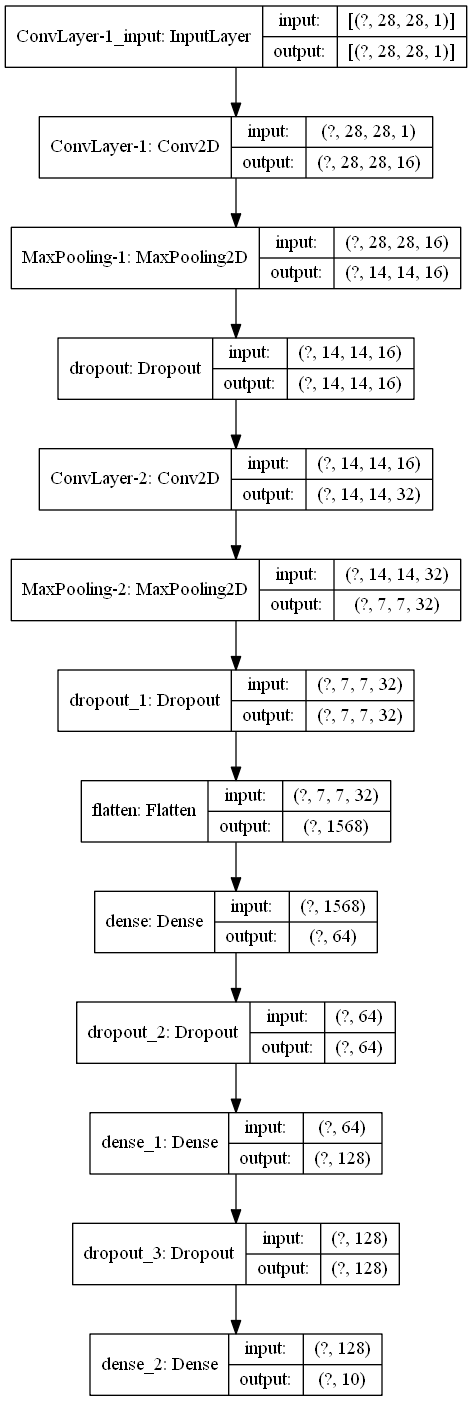

In [7]:
plot_model(model, 'cnn-model.png', show_shapes=True, show_layer_names=True)

In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3634 - accuracy: 0.8839 - val_loss: 0.0762 - val_accuracy: 0.9768
Epoch 2/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.1369 - accuracy: 0.9584 - val_loss: 0.0507 - val_accuracy: 0.9852
Epoch 3/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1066 - accuracy: 0.9681 - val_loss: 0.0496 - val_accuracy: 0.9862
Epoch 4/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0905 - accuracy: 0.9728 - val_loss: 0.0421 - val_accuracy: 0.9875
Epoch 5/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0813 - accuracy: 0.9758 - val_loss: 0.0413 - val_accuracy: 0.9878
Epoch 6/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0753 - accuracy: 0.9777 - val_loss: 0.0383 - val_accuracy: 0.9894
Epoch 7/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0691 - accuracy: 0.9791 - val_loss: 0.0388 -

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0293 - accuracy: 0.9906


# Visualizing convolutions!

In [10]:
conv1 = model.get_layer('ConvLayer-1').output
conv2 = model.get_layer('ConvLayer-2').output

In [11]:
from tensorflow.keras import Model

inp = model.inputs
conv_layer_1 = Model(inputs=inp, outputs=conv1)
conv_layer_2 = Model(inputs=inp, outputs=conv2)

In [12]:
index = 5

example = X_train[index]
first_layer_outputs = conv_layer_1.predict(example[np.newaxis, ...])
second_layer_outputs = conv_layer_2.predict(example[np.newaxis, ...])

In [13]:
first_layer_outputs = np.squeeze(first_layer_outputs)
second_layer_outputs = np.squeeze(second_layer_outputs)

print(f'Shapes of `first-layer-outputs` : {first_layer_outputs.shape}')
print(f'Shapes of `second-layer-outputs` : {second_layer_outputs.shape}')

Shapes of `first-layer-outputs` : (28, 28, 16)
Shapes of `second-layer-outputs` : (14, 14, 32)


(-0.5, 27.5, 27.5, -0.5)

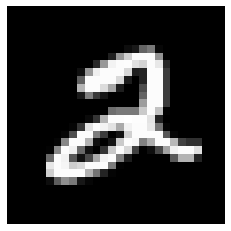

In [14]:
plt.imshow(np.squeeze(example), cmap='gray')
plt.axis('off')

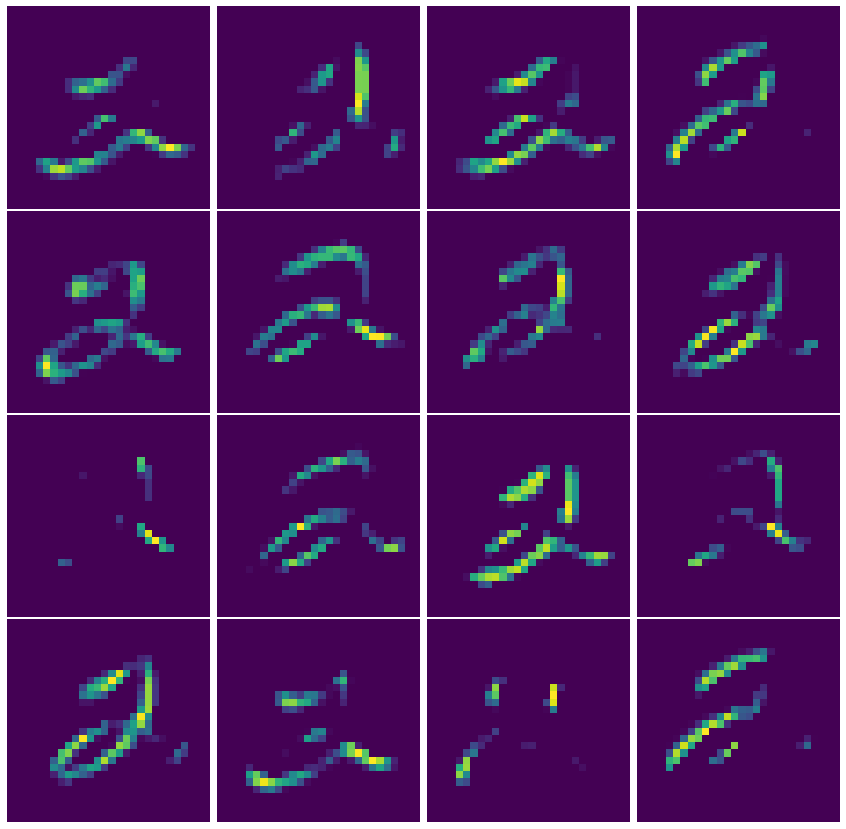

In [18]:
plt.figure(figsize=(15, 15))

for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(first_layer_outputs[:, :, n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

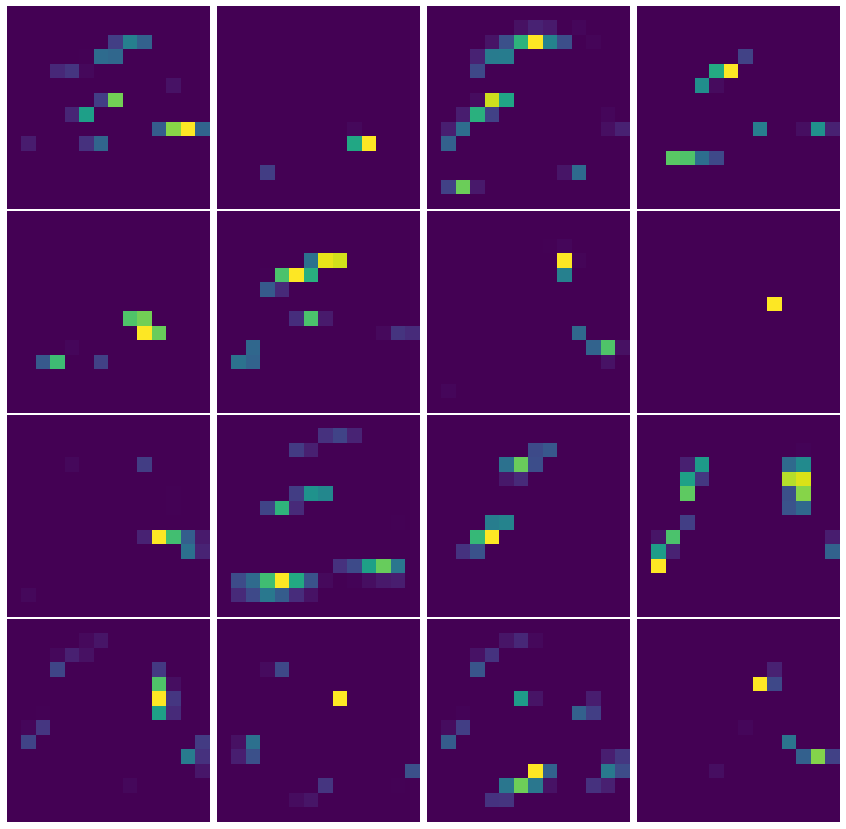

In [16]:
plt.figure(figsize=(15, 15))

for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(second_layer_outputs[:, :, n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)